# Chapter 2

In [1]:
import os
import pandas as pd
from dataclasses import dataclass
import statsmodels.api as sm
import statsmodels.formula.api as smf

@dataclass
class PSET:
    awd: str = os.getenv('AWD')

    @property
    def data_dir(self) -> str:
        return f'{pset.awd}/data/chapter_2'
    
pset = PSET()
pset

PSET(awd='/Users/rwk/Development/tutorials/intro_linear_regression_analysis')

## setup
___

$$
\newcommand{\prob}[1]{\mathbb{P}\left( #1 \right)}
\newcommand{\exp}[1]{\mathbb{E}\left( #1 \right)}
\newcommand{\var}[1]{\mathbb{V}\text{ar}\left( #1 \right)}
\newcommand{\se}[1]{\textrm{se}\left( #1 \right)}
\newcommand{\Xhat}{\widehat{X}}
\newcommand{\Xbar}{\bar{X}}
\newcommand{\yhat}{\hat{y}}
\newcommand{\ybar}{\bar{y}}
\newcommand{\xbar}{\bar{x}}
\newcommand{\bz}{\beta_0}
\newcommand{\bo}{\beta_1}
\newcommand{\bzh}{\hat{\beta}_0}
\newcommand{\boh}{\hat{\beta}_1}
\newcommand{\eps}{\varepsilon}
\newcommand{\sse}{SS_\textrm{Res}}
\newcommand{\sst}{SS_\textrm{T}}
\newcommand{\ssr}{SS_\textrm{R}}
\newcommand{\mse}{MS_\textrm{Res}}
\newcommand{\mst}{MS_\textrm{T}}
\newcommand{\msr}{MS_\textrm{R}}
\newcommand{\sumi}{\sum_{i=1}^n}
\newcommand{\sumj}{\sum_{j=1}^n}
\newcommand{\Sxx}{S_{xx}}
\newcommand{\Sxy}{S_{xy}}
\newcommand{\sqh}{\hat{\sigma}^2}
$$

\begin{align*}
\textrm{\\prob\{X\}} &\rightarrow \prob{X} \\
\textrm{\\exp\{X\}} &\rightarrow \exp{X} \\
\textrm{\\var\{X\}} &\rightarrow \var{X} \\
\textrm{\\se\{X\}} &\rightarrow \se{X} \\
\textrm{\\Xhat} &\rightarrow \Xhat \\
\textrm{\\Xbar} &\rightarrow \Xbar \\
\textrm{\\yhat} &\rightarrow \yhat \\
\textrm{\\ybar} &\rightarrow \ybar \\
\textrm{\\xbar} &\rightarrow \xbar \\
\textrm{\\bz} &\rightarrow \bz \\
\textrm{\\bo} &\rightarrow \bo \\
\textrm{\\bzh} &\rightarrow \bzh \\
\textrm{\\boh} &\rightarrow \boh \\
\textrm{\\eps} &\rightarrow \eps \\
\textrm{\\sse} &\rightarrow \sse \\
\textrm{\\sst} &\rightarrow \sst \\
\textrm{\\ssr} &\rightarrow \ssr \\
\textrm{\\mse} &\rightarrow \mse \\
\textrm{\\mst} &\rightarrow \mst \\
\textrm{\\msr} &\rightarrow \msr \\
\textrm{\\sumi} &\rightarrow \sumi \\
\textrm{\\sumj} &\rightarrow \sumj \\
\textrm{\\Sxx} &\rightarrow \Sxx \\
\textrm{\\Sxy} &\rightarrow \Sxy \\
\textrm{\\sqh} &\rightarrow \sqh \\
\end{align*}


## 2.1 SIMPLE LINEAR REGRESSION MODEL
___

The goal is to model the relationship between a response, $y$ and a single regressor (or feature), $x$.

$$y = f(x) + \eps$$

where the function, $f(x)$, unknown.
First, consider the **simple linear regression model**, that is, a model that assumes the relationship is a straight line.

$$y = \bz + \bo x + \eps$$

Here we'll assume that $x$ is unknown data (i.e., not random) and $y$ is the response which we treat as a random variable.  Thus

\begin{align*}
\exp{y | x} &= \bz + \bo x \\
\var{y | x} &= \var{\bz + \bo x + \eps} = \sigma^2
\end{align*}

Notes:
 * the mean of $y$ is a function of $x$
 * the variance does not depend on $x$
 * the errors are uncorrelated
 * the parameters $\bz$ and $\bo$ are called the **regression coefficients**

## 2.2 LEAST-SQUARES ESTIMATION OF THE PARAMETERS
___

The parameters $\bz$ and $\bo$ are unknown and must be estimated from the sample data, $(y_1, x_1), \dots, (y_n, x_n)$.

### 2.2.1 Estimation of $\bz$ and $\bo$ 

To predict values of $y$, we assume $\exp{\eps}=0$ and $\var{\eps} = \sigma^2$ and take

$$
\exp{y|x} = \bz + \bo x 
$$

To find the estimates of the coefficients, we find the $\bz$ and $\bo$ that mininmize the **sum of square errors** as

\begin{align*}
S(\bz, \bo) &= \sumi \eps_i^2 \\
           &= \sumi \left(y_i - \bz - \bo x_i \right)^2
\end{align*}

Thes the least-square estimates of the coefficients, $\bzh$ and $\boh$, are taken to satisfy the following

\begin{align*}
0 &= \left. \frac{\partial}{\partial \bz} S(\bz, \bo) \right|_{\bzh,\boh} = -2 \sumi \left(y_i - \bz - \bo x_i \right) \\
0 &= \left. \frac{\partial}{\partial \bo} S(\bz, \bo) \right|_{\bzh,\boh}= -2 \sumi \left(y_i - \bz - \bo x_i \right) x_i
\end{align*}

Solving yields the **least-squares normal questions**

\begin{align*}
n \bzh + \boh\sumi x_i &= \sumi y_i \\
\bzh \sumi x_i + \boh \sumi x_i^2 &= \sumi y_i x_i
\end{align*}

Solving the first equstion fo $\bzh$ and converting to means, we get

$$\bzh = \ybar - \boh \xbar$$

and then using this to solve for $\boh$

\begin{align*}
\bzh = \frac{\sumi y_i x_i - \frac{\left(\sumi y_i \right) \left(\sumi x_i \right)}{n}}{\sumi x_i^2 - \frac{\left(\sumi x_i \right)^2}{n}}
\end{align*}

Rewrite using

\begin{align*}
\Sxx &= \sumi x_i^2 - \frac{\left(\sumi x_i \right)^2}{n}  = \sumi (x_i - \xbar)^2 \\
\Sxy &= \sumi y_i x_i - \frac{\left(\sumi y_i \right) \left(\sumi x_i \right)}{n} = \sumi y_i (x_i - \xbar)
\end{align*}

Thus, you can write $\boh$

\begin{align*}
\boh = \frac{\Sxy}{\Sxx}
\end{align*}

Thus the fitted regressions model of $y$ becomes

$$
\yhat = \bzh + \boh x 
$$

We define the difference between the predicted value, $\yhat$ and $y$ as the **residual**:

$$e_i = y_i - \yhat_i$$


#### Example 2.2

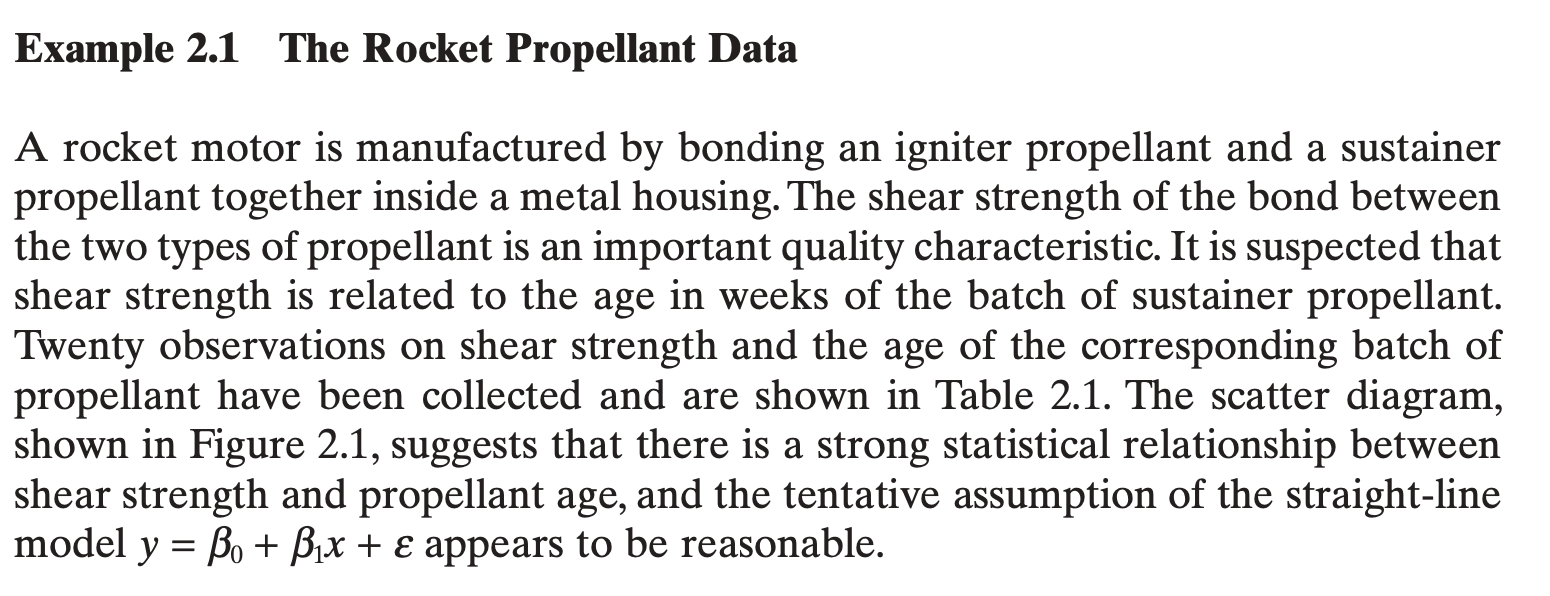

In [2]:
e2p1_df = pd.read_excel(f'{pset.data_dir}/Examples/data-ex-2-1 (Rocket Prop).xls')
e2p1_df

,"Observation, i","Shear Strength, yi (psi)","Age of Propellant, xi (weeks)"
0,1,2158.70,15.50
1,2,1678.15,23.75
2,3,2316.00,8.00
3,4,2061.30,17.00
4,5,2207.50,5.50
5,6,1708.30,19.00
6,7,1784.70,24.00
7,8,2575.00,2.50
8,9,2357.90,7.50
9,10,2256.70,11.00


In [3]:
e2p1_df.rename(columns={
    'Observation, i'                : 'n',
    'Shear Strength, yi (psi)'      : 'strength',
    'Age of Propellant, xi (weeks)' : 'age',
}, inplace=True)
e2p1_df.head()

,n,strength,age
0,1,2158.70,15.50
1,2,1678.15,23.75
2,3,2316.00,8.00
3,4,2061.30,17.00
4,5,2207.50,5.50


<Axes: xlabel='age', ylabel='strength'>

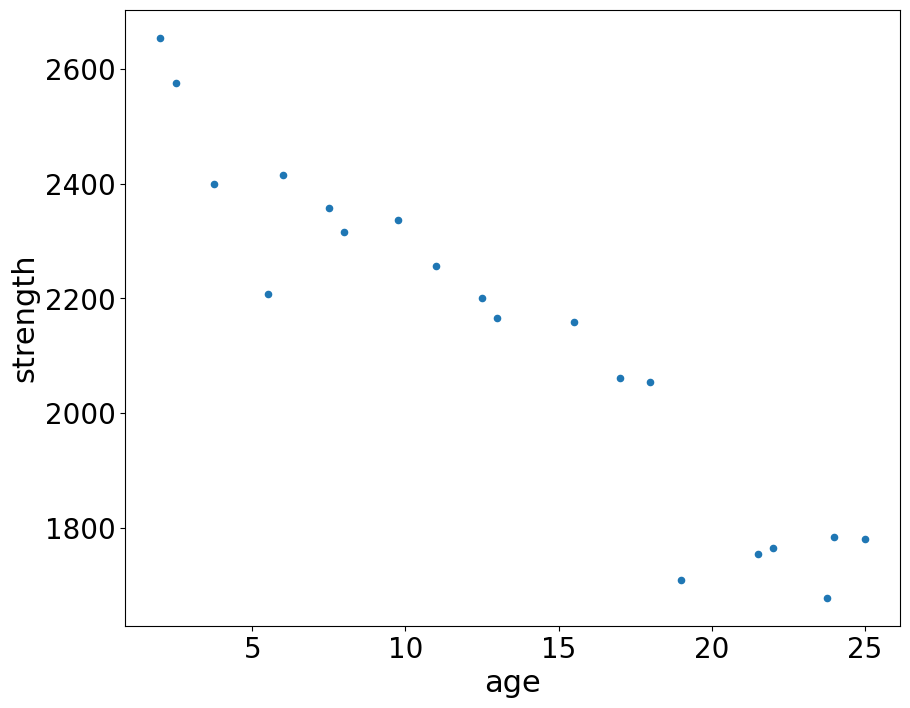

In [4]:
e2p1_df.plot.scatter(x='age', y='strength')

In [5]:
x = e2p1_df.age.values.reshape(-1, 1)
y = e2p1_df.strength.values.reshape(-1, 1)
x.shape, y.shape

((20, 1), (20, 1))

In [6]:
S_xx = ((x - x.mean())**2).sum()
S_xx

np.float64(1106.559375)

In [7]:
S_xy = (y*(x - x.mean())).sum()
S_xy

np.float64(-41112.654375000035)

In [8]:
beta1 = S_xy/S_xx
beta1

np.float64(-37.15359094490527)

In [9]:
beta0 = y.mean() - beta1*x.mean() 
beta0

np.float64(2627.8223590012963)

In [10]:
result_df = e2p1_df.copy()
result_df['y']    = y 
result_df['x']    = x 
result_df['yhat'] = beta0 + beta1*x
result_df['e']    = result_df.y - result_df.yhat 
result_df

,n,strength,age,y,x,yhat,e
0,1,2158.70,15.50,2158.70,15.50,2051.941699,106.758301
1,2,1678.15,23.75,1678.15,23.75,1745.424574,-67.274574
2,3,2316.00,8.00,2316.00,8.00,2330.593631,-14.593631
3,4,2061.30,17.00,2061.30,17.00,1996.211313,65.088687
4,5,2207.50,5.50,2207.50,5.50,2423.477609,-215.977609
5,6,1708.30,19.00,1708.30,19.00,1921.904131,-213.604131
6,7,1784.70,24.00,1784.70,24.00,1736.136176,48.563824
7,8,2575.00,2.50,2575.00,2.50,2534.938382,40.061618
8,9,2357.90,7.50,2357.90,7.50,2349.170427,8.729573
9,10,2256.70,11.00,2256.70,11.00,2219.132859,37.567141


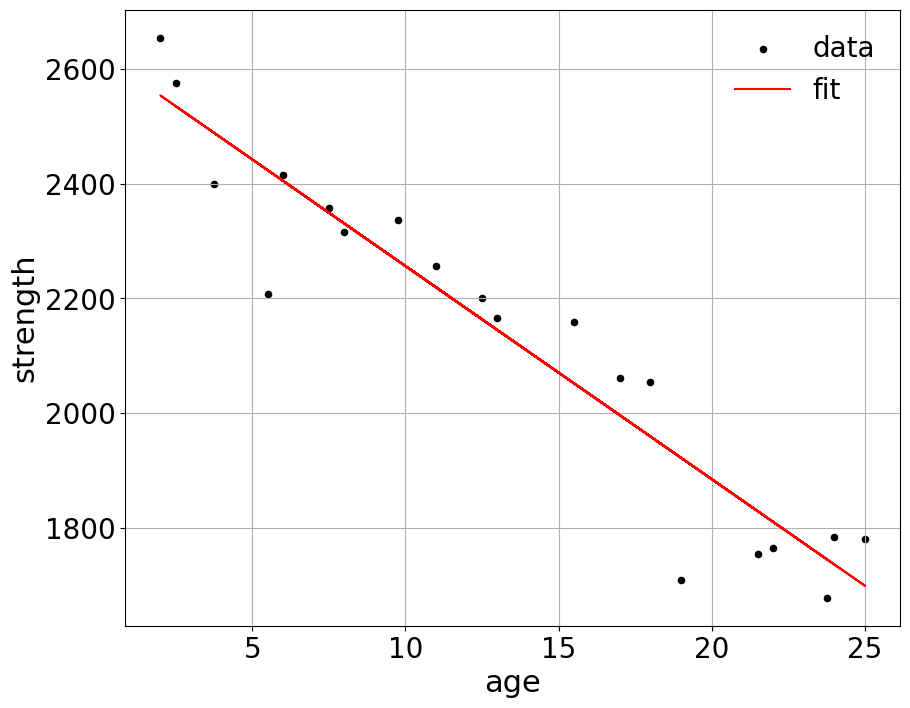

In [11]:
_, ax = plt.subplots()

result_df.plot.scatter(ax=ax, x='age', y='strength', color='k', label='data')
result_df.plot(ax=ax, x='age', y='yhat', color='r', label='fit')
ax.grid()
ax.legend(frameon=False)

### 2.2.2 Properties of the Least-Squares Estimators and the Fitted Regression Model
___

Estimate $\sigma^2$ with

\begin{align*}
\sqh = \sse &= \sumi e_i^2 \\
            &= \sumi (y_i - \yhat_i)^2 \\
            &= \sumi y_i - n \ybar^2 - \boh \Sxy  \\
            &= \sumi (y_i - \ybar)^2 - \boh \Sxy  \\
            &= \sst - \boh \Sxy 
\end{align*}

Where **corrected sum of squares**, $\sst$, is defined as 
\begin{align*}
\sst = \sumi (y_i - \ybar)^2
\end{align*}

It can be shown that $\exp{\sse} = (n-2)\sigma^2$.
So an **unbiased estimator** for $\sigma^2$ is

\begin{align*}
\mse = \sqh = \frac{\sse}{n - 2}
\end{align*}

**note** $\sse$ has $n-2$ degrees of freedom:
 * $n$ for the $y_i$'s
 * 2 contraints for $\bzh$ and $\boh$ since they are dependent on the $y_i$'s

#### Example 2.2: Estimate $\sigma^2$ for the rocket data.

In [12]:
from lra.simple_linear_regression import *

In [13]:
sst = ((y - y.mean())**2).sum()
sst

np.float64(1693737.601375)

In [14]:
sst = SST(y)
sst

np.float64(1693737.6014)

In [15]:
sse = SSE(x, y)
sse

np.float64(166254.4849)

In [16]:
mse = MSE(x, y)
mse

np.float64(9236.3603)

## 2.3 HYPOTHESIS TESTING ON THE SLOPE AND INTERCEPT
___

### 2.3.2 Testing Significance of Regression

To test the **significance of regressions**, use the following test:

\begin{align*}
H_0:\ \beta_1 &= 0 \\
H_1:\ \beta_1 &\neq 0
\end{align*}

Failing to reject $H_0$ implies that there is a linear relationaship between $x$ and $y$.

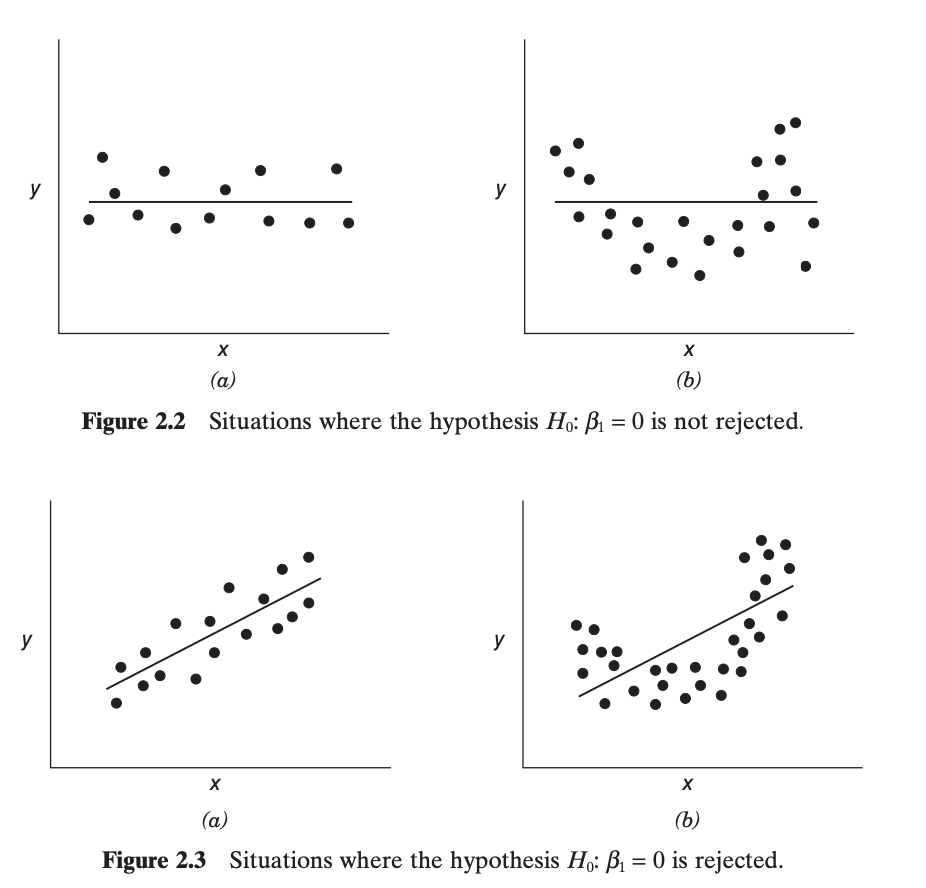

The test procedure is to construct your $t-$test:

\begin{align*}
t_0 = \frac{\boh}{\text{se}\left(\boh\right)}
\end{align*}

where

\begin{align*}
\text{se}\left(\boh\right) &= \sqrt{\frac{\sqh}{\Sxx}} \\
                           &= \sqrt{\frac{\mse}{\Sxx}}
\end{align*}

The null hypothesis of significance of regression would be rejected if $|t_0| > t_{\alpha/2,n−2}$.

#### Example 2.3 Test the Rocket Propellant Data regression significance

In [17]:
TTest(x, y, alpha=0.05, ndec=2)

{'n': 20,
 't0': np.float64(-12.85),
 't_value': np.float64(2.1),
 'p_value': np.float64(1.6641044098264501e-10),
 'reject': np.True_}

In [18]:
beta1 = Beta_1(x, y, 2)
se = se_Beta1(x, y, 2)
t0 = beta1 / se
t0

np.float64(-12.854671280276815)

In [19]:
from scipy.stats import t

n = len(x)
alpha = 0.05
t_value = np.round(t(n-2).ppf(1 - alpha / 2), 3)
t_value

np.float64(2.101)

In [20]:
np.abs(t0) > t_value

np.True_

### 2.3.3 Analysis of Variance (ANOVA) 

Write

\begin{align*}
y_i − \ybar = (\yhat_i - \ybar) + (y_i - \yhat_i)
\end{align*}

Squaring both sides and summing over the $n$ examples produces

\begin{align*}
\sumi (y_i − \ybar) = \sum_i (\yhat_i - \ybar)^2 + \sumi (y_i - \yhat_i)^2 + 2 \sumi (\yhat_i - \ybar)(y_i - \yhat_i)
\end{align*}

The cross term vanishes and you're left with

\begin{align*}
\sumi (y_i − \ybar)^2 &= \sum_i (\yhat_i - \ybar)^2 + \sumi (y_i - \yhat_i)^2  \\
\sst &= \ssr + \sse 
\end{align*}

**Analysis of the Variance for Testing Signficance of Regression:

Source of Variation | Sum of Squares | Degree of Freedom| Mean square | $F_0$ | $P$-value | test
--- | :--- | :---: | :---: | :---: | :---:| :---:
*Regression* | $\ssr = \boh \Sxy$ | $1$ | $\msr$ | $\frac{\msr}{\mse}$ | $\prob{F > F_0} = 1 - \text{CDF}(F_0)$ | reject if $P$-value < $\alpha$
*Residual* | $\sse = \sst - \boh \Sxy$ | $n -2$ | $\mse$ | | |
*Total* | $\sst$ | $n -1$ |  | | |

#### Example 2.4 The Rocket Propellant Data ANOVA

In [21]:
ANOVA(x, y, 0.05, 2)

,source,sum_sq,df,mean_sq,F_0,p_value,reject
0,regression,1527334.95,1,1527334.95,165.21,1.66e-10,True
1,residual,166402.65,18,9244.59,NaN,None,None
2,total,1693737.60,19,NaN,NaN,None,None


In [22]:
TTest(x, y, 0.05, 2)

{'n': 20,
 't0': np.float64(-12.85),
 't_value': np.float64(2.1),
 'p_value': np.float64(1.6641044098264501e-10),
 'reject': np.True_}

## 2.4 INTERVAL ESTIMATION IN SIMPLE LINEAR REGRESSION
___

### 2.4.1 Confidence Intervals on β0, β1, and σ2

An $100(1-\alpha)$ confidence interval (CI) on the coeffiencets are 

\begin{align*}
\boh - t_{\alpha/2, n-2} \se{\boh} &\leq \beta_1 \leq \boh + t_{\alpha/2, n-2} \se{\boh} \\
\bzh - t_{\alpha/2, n-2} \se{\bzh} &\leq \beta_0 \leq \bzh + t_{\alpha/2, n-2} \se{\bzh} \\
\frac{(n-2)\mse}{\chi^2_{\alpha/2, n-2}} &\leq \sigma^2 \leq \frac{(n-2)\mse}{\chi^2_{1-\alpha/2, n-2}}
\end{align*}

#### Example 2.5 The Rocket Propellant Data CI

In [23]:
alpha = 0.05
n     = len(x)
t     = TValue(n-2, alpha)
se    = se_Beta1(x, y, 2)
beta1 = Beta_1(x, y, 2)
beta1, se, t

(np.float64(-37.15), np.float64(2.89), np.float64(2.1009))

In [24]:
(beta1 - t*se, beta1 + t*se)

(np.float64(-43.221601), np.float64(-31.078398999999997))

In [25]:
from scipy.stats import chi2

mse = MSE(x, y, 2)
chi2_025 = chi2(n-2).ppf(1-alpha/2)
chi2_975 = chi2(n-2).ppf(alpha/2)
mse, chi2_025, chi2_975 

(np.float64(9244.59),
 np.float64(31.52637844038663),
 np.float64(8.230746194756668))

In [26]:
[(n-2)*mse/chi2_025, (n-2)*mse/chi2_975]

[np.float64(5278.2028330545945), np.float64(20217.197330906096)]

### 2.4.2 Interval Estimation of the Mean Response

Recall n unbiased point estimator of $\exp{y|x_0}$ is found from the fitted model as

\begin{align*}
\widehat{\exp{y | x_0}} &= \hat{\mu}_{y|x_0} = \bzh + \boh x_0
\end{align*}

An $100(1-\alpha)$ confidence interval (CI) on the mean response at the point $x=x_0$ is

\begin{align*}
\hat{\mu}_{y|x_0} - t_{\alpha/2, n-2} \sqrt{\mse\left( \frac{1}{n} + \frac{(x_0 - \xbar)^2}{\Sxx} \right)}
\leq \exp{y | x_0} \leq
\hat{\mu}_{y|x_0} + t_{\alpha/2, n-2} \sqrt{\mse\left( \frac{1}{n} + \frac{(x_0 - \xbar)^2}{\Sxx} \right)}
\end{align*}

#### Example 2.6 The Rocket Propellant Data: Mean Response CI

In [27]:
x_0 = np.append(np.arange(3, 27, 3), [13.3625])
x_0 = np.sort(x_0)
x_0.shape

(9,)

In [28]:
x_0

array([ 3.   ,  6.   ,  9.   , 12.   , 13.363, 15.   , 18.   , 21.   , 24.   ])

In [29]:
beta0 = Beta_0(x, y, 2)
beta1 = Beta_1(x, y, 2)
mu_hat = beta0 + beta1*x_0
mu_hat.shape

(9,)

In [30]:
alpha = 0.05
t     = TValue(n-2, alpha)
n     = len(x)
sxx   = S_xx(x, 2)
mse   = MSE(x, y, 2)
ci_minus = mu_hat - t*np.sqrt(mse*(1/n + ((x_0 - x.mean())**2)/sxx))
ci_plus  = mu_hat + t*np.sqrt(mse*(1/n + ((x_0 - x.mean())**2)/sxx))
ci_minus.shape, ci_plus.shape

((9,), (9,))

In [31]:
pd.DataFrame({
    'x_0'      : x_0,
    'ci_minus' : ci_minus,
    'mu_hat'   : mu_hat,
    'ci_plus'  : ci_plus,
})

,x_0,ci_minus,mu_hat,ci_plus
0,3.0000,2438.861683,2516.320000,2593.778317
1,6.0000,2341.316861,2404.870000,2468.423139
2,9.0000,2241.056378,2293.420000,2345.783622
3,12.0000,2136.050142,2181.970000,2227.889858
4,13.3625,2086.184777,2131.353125,2176.521473
5,15.0000,2024.270085,2070.520000,2116.769915
6,18.0000,1905.842068,1959.070000,2012.297932
7,21.0000,1782.881234,1847.620000,1912.358766
8,24.0000,1657.349065,1736.170000,1814.990935


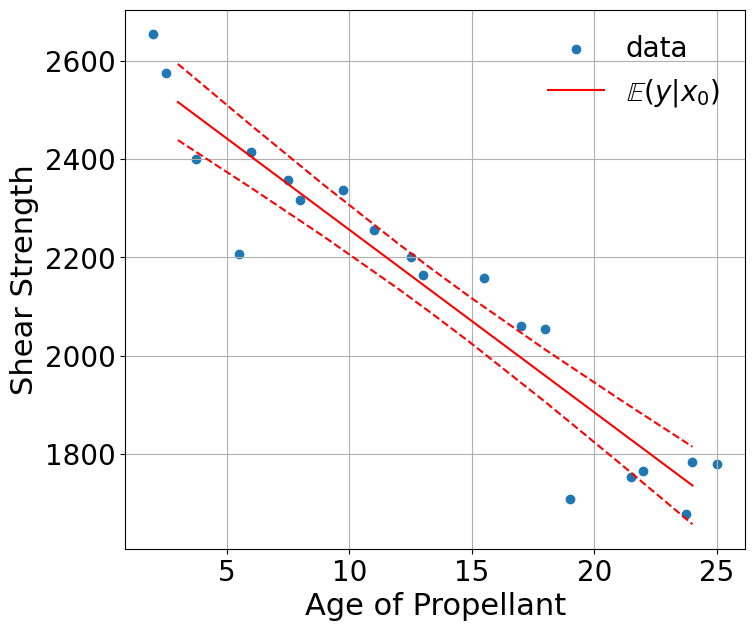

In [32]:
fig, ax = plt.subplots(figsize=(8,7))

ax.scatter(x, y, label='data')
ax.plot(x_0, mu_hat, color='r', label=r'$\mathbb{E}(y | x_0)$')
ax.plot(x_0, ci_minus, color='r', linestyle='--')
ax.plot(x_0, ci_plus, color='r', linestyle='--')
ax.legend(frameon=False)
ax.set_xlabel("Age of Propellant")
ax.set_ylabel("Shear Strength")
ax.grid()

### 2.5 PREDICTION OF NEW OBSERVATIONS

Suppose $x_0$ is a new observation and we wish to predict $y_0$.  If our model holds, then

\begin{align*}
y_0 &= \bz + \bo x_0 + \eps
\end{align*}

The expected value of $y_0$ is
\begin{align*}
\exp{y_0}
    &= \exp{\bz + \bo x_0 + \eps}  \\
    &= \exp{\bz + \bo x_0} + \exp{0} \\
    &= \bz + \bo x_0
\end{align*}

Then to estimate $y_0$, we use the following
\begin{align*}
\hat{y}_0 &= \bzh + \boh x_0
\end{align*}

To variance is
\begin{align*}
\var{y_0}
    &= \var{\bz + \bo x_0 + \eps}  \\
    &= \var{\bz + \bo x_0} + \var{\eps} \\
    &= \sigma^2 \left( \frac{1}{n} + \frac{(x_0 - \xbar)^2}{\Sxx} \right) + \sigma^2 \\
    &= \sigma^2 \left(1 + \frac{1}{n} + \frac{(x_0 - \xbar)^2}{\Sxx} \right)
\end{align*}

**note**: The error is independant of the coeficients.
Thus the estimate for $\var{y_0}$ is
\begin{align*}
\widehat{\var{y_0}}
    &= \mse \left(1 + \frac{1}{n} + \frac{(x_0 - \xbar)^2}{\Sxx} \right)
\end{align*}

An $100(1-\alpha)$ confidence interval (CI) on the new observation at the point $x=x_0$ is

\begin{align*}
\hat{y}_0 - t_{\alpha/2, n-2} \sqrt{\msr\left(1 + \frac{1}{n} + \frac{(x_0 - \xbar)^2}{\Sxx} \right)}
\leq y_0 \leq
\hat{y}_0 + t_{\alpha/2, n-2} \sqrt{\msr\left(1 +  \frac{1}{n} + \frac{(x_0 - \xbar)^2}{\Sxx} \right)}
\end{align*}

#### Example 2.7 The Rocket Propellant Data: PI interval

In [33]:
x_0 = np.append(np.arange(3, 27, 3), [10])
x_0 = np.sort(x_0)
x_0.shape

(9,)

In [34]:
x_0

array([ 3,  6,  9, 10, 12, 15, 18, 21, 24])

In [35]:
beta0 = Beta_0(x, y, 2)
beta1 = Beta_1(x, y, 2)
mu_hat = beta0 + beta1*x_0
mu_hat.shape

(9,)

In [36]:
y0 = beta0 + beta1*x_0
y0.shape

(9,)

In [37]:
alpha    = 0.05
t        = TValue(n-2, alpha)
n        = len(x)
sxx      = S_xx(x, 2)
mse      = MSE(x, y, 2)
ci_minus = mu_hat - t*np.sqrt(mse*(1/n + ((x_0 - x.mean())**2)/sxx))
ci_plus  = mu_hat + t*np.sqrt(mse*(1/n + ((x_0 - x.mean())**2)/sxx))
y0       = mu_hat
pi_minus = y0 - t*np.sqrt(mse*(1 + 1/n + ((x_0 - x.mean())**2)/sxx))
pi_plus  = y0 + t*np.sqrt(mse*(1 + 1/n + ((x_0 - x.mean())**2)/sxx))
pi_minus.shape, pi_plus.shape

((9,), (9,))

In [38]:
pd.DataFrame({
    'x_0'      : x_0,
    'pi_minus' : pi_minus,
    'ci_minus' : ci_minus,
    'mu_hat'   : mu_hat,
    'ci_plus'  : ci_plus,
    'pi_plus'  : pi_plus,
})

,x_0,pi_minus,ci_minus,mu_hat,ci_plus,pi_plus
0,3,2299.979101,2438.861683,2516.32,2593.778317,2732.660899
1,6,2193.109297,2341.316861,2404.87,2468.423139,2616.630703
2,9,2084.744312,2241.056378,2293.42,2345.783622,2502.095688
3,10,2048.277959,2206.700905,2256.27,2305.839095,2464.262041
4,12,1974.817333,2136.050142,2181.97,2227.889858,2389.122667
5,15,1863.293919,2024.270085,2070.52,2116.769915,2277.746081
6,18,1750.175752,1905.842068,1959.07,2012.297932,2167.964248
7,21,1635.500454,1782.881234,1847.62,1912.358766,2059.739546
8,24,1519.337499,1657.349065,1736.17,1814.990935,1953.002501


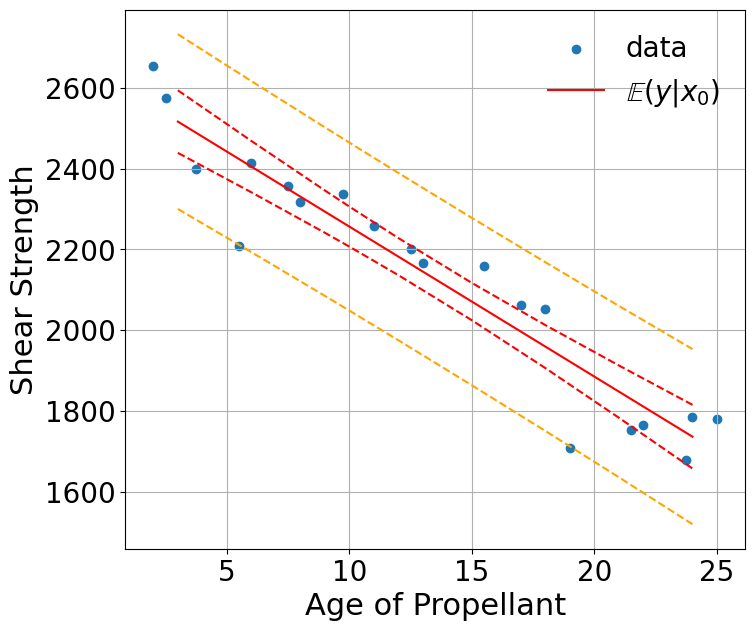

In [39]:
fig, ax = plt.subplots(figsize=(8,7))

ax.scatter(x, y, label='data')
ax.plot(x_0, mu_hat, color='r', label=r'$\mathbb{E}(y | x_0)$')
ax.plot(x_0, ci_minus, color='r', linestyle='--')
ax.plot(x_0, ci_plus, color='r', linestyle='--')
ax.plot(x_0, pi_minus, color='orange', linestyle='--')
ax.plot(x_0, pi_plus, color='orange', linestyle='--')
ax.legend(frameon=False)
ax.set_xlabel("Age of Propellant")
ax.set_ylabel("Shear Strength")
ax.grid()

## 2.6 COEFFICIENT OF DETERMINATION
___

The quantity

\begin{align*}
R^2 = \frac{\ssr}{\sst} = 1 - \frac{\sse}{\sst}
\end{align*}

is called the **coefficient of determination**. 

Because $0 \leq \sse \leq \sst$, it follows that $0 \leq R^2 \leq 1$. 
Values of $R^2$ that are close to 1 imply that most of the variability in $y$ is explained by the regression model. 

In [40]:
# rocket data

ssr = SSR(x, y, 2)
sst = SST(y, 2)
R2 = ssr/sst
ssr, sst, R2

(np.float64(1527334.95), np.float64(1693737.6), np.float64(0.901754173727973))

## using statsmodel
___

In [41]:
model = smf.ols(formula='strength ~ age', data=e2p1_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     165.4
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           1.64e-10
Time:                        09:05:01   Log-Likelihood:                -118.63
No. Observations:                  20   AIC:                             241.3
Df Residuals:                      18   BIC:                             243.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2627.8224     44.184     59.475      0.000    2534.995    2720.649
age          -37.1536      2.889    -12.860      0.000     -43.223     -31.084
==============================================================================
Omnibus:                        6.304   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.281
Skew:                          -1.109   Prob(JB):                        0.118
Kurtosis:                       3.464   Cond. No.                         31.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
age,1.527483e+06,1.0,165.376758,1.643344e-10
Residual,1.662549e+05,18.0,NaN,NaN


In [43]:
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,1.527483e+06,1.527483e+06,165.376758,1.643344e-10
Residual,18.0,1.662549e+05,9.236381e+03,NaN,NaN


In [44]:
sm.stats.anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,3.267123e+07,1.0,3537.233102,4.063559e-22
age,1.527483e+06,1.0,165.376758,1.643344e-10
Residual,1.662549e+05,18.0,NaN,NaN


In [45]:
x_0 = np.append(np.arange(3, 27, 3), [10, 13.3625])
x_0 = np.sort(x_0)
x_0.shape

(10,)

In [46]:
y_pred_df = model.get_prediction({'age' : x_0}).summary_frame(alpha)
y_pred_df['x'] = x_0
y_pred_df

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,x
0,2516.361586,36.852745,2438.936841,2593.786331,2300.114487,2732.608685,3.0000
1,2404.900813,30.237005,2341.375222,2468.426404,2193.231927,2616.569699,6.0000
2,2293.440040,24.913310,2241.099119,2345.780962,2084.854833,2502.025248,9.0000
3,2256.286450,23.583742,2206.738845,2305.834054,2048.384594,2464.188305,10.0000
4,2181.979268,21.847525,2136.079321,2227.879215,1974.916423,2389.042113,12.0000
5,2131.357500,21.489976,2086.208737,2176.506263,1924.459875,2338.255125,13.3625
6,2070.518495,22.004558,2024.288634,2116.748356,1863.382268,2277.654722,15.0000
7,1959.057722,25.324527,1905.852865,2012.262579,1750.254050,2167.861394,18.0000
8,1847.596949,30.801097,1782.886245,1912.307654,1635.569376,2059.624523,21.0000
9,1736.136176,37.501045,1657.349404,1814.922949,1519.397688,1952.874664,24.0000


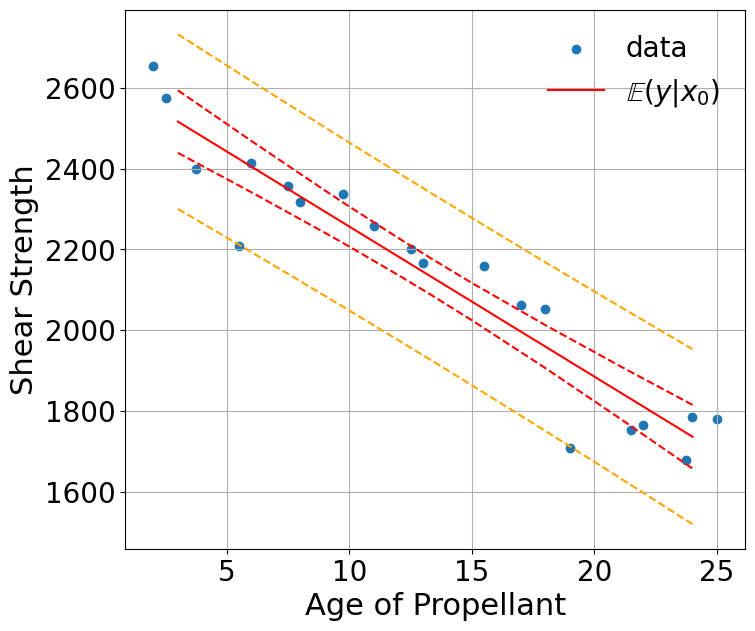

In [47]:
fig, ax = plt.subplots(figsize=(8,7))

ax.scatter(x, y, label='data')
y_pred_df.set_index('x')['mean'         ].plot(ax=ax, color='r', label=r'$\mathbb{E}(y | x_0)$')
y_pred_df.set_index('x')['mean_ci_lower'].plot(ax=ax, color='r', linestyle='--', label='')
y_pred_df.set_index('x')['mean_ci_upper'].plot(ax=ax, color='r', linestyle='--', label='')
y_pred_df.set_index('x')['obs_ci_lower' ].plot(ax=ax, color='orange', linestyle='--', label='')
y_pred_df.set_index('x')['obs_ci_upper' ].plot(ax=ax, color='orange', linestyle='--', label='')
ax.legend(frameon=False)
ax.set_xlabel("Age of Propellant")
ax.set_ylabel("Shear Strength")
ax.grid()